# EDA

In [1]:
import pandas as pd

fake_path = r"D:\Excelr\P 467\Fake.csv"
true_path = r"D:\Excelr\P 467\True.csv"

try:
    # Load datasets
    fake_data = pd.read_csv(fake_path, encoding='latin1', usecols=['title', 'text', 'subject', 'date'])
    true_data = pd.read_csv(true_path, encoding='latin1', usecols=['title', 'text', 'subject', 'date'])

    # Add labels to distinguish fake and real news
    fake_data['label'] = 0  # Fake news
    true_data['label'] = 1  # Real news

    # Combine the datasets
    news_data = pd.concat([fake_data, true_data], ignore_index=True)

    # Display basic information about the combined dataset
    news_data_info = {"Shape": news_data.shape,"Null Values": news_data.isnull().sum().to_dict(),"Sample Data": news_data.head().to_dict()}
except Exception as e:
    news_data_info = str(e)

news_data_info


{'Shape': (44900, 5),
 'Null Values': {'title': 0, 'text': 2, 'subject': 2, 'date': 3, 'label': 0},
 'Sample Data': {'title': {0: ' Donald Trump Sends Out Embarrassing New Year\x19s Eve Message; This is Disturbing',
   1: ' Drunk Bragging Trump Staffer Started Russian Collusion Investigation',
   2: ' Sheriff David Clarke Becomes An Internet Joke For Threatening To Poke People \x18In The Eye\x19',
   3: ' Trump Is So Obsessed He Even Has Obama\x19s Name Coded Into His Website (IMAGES)',
   4: ' Pope Francis Just Called Out Donald Trump During His Christmas Speech'},
  'text': {0: 'Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media.  The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News

In [2]:
# Step 1: Handle missing values
# Remove rows with missing values as the number is very small compared to the dataset size
news_data_cleaned = news_data.dropna().reset_index(drop=True)

# Verify that there are no missing values left
missing_values_after_cleaning = news_data_cleaned.isnull().sum()

# Output the cleaned dataset's basic stats
cleaned_dataset_info = {"Shape After Cleaning": news_data_cleaned.shape,"Missing Values After Cleaning": missing_values_after_cleaning.to_dict(),
                        "Sample Data After Cleaning": news_data_cleaned.head().to_dict()}

cleaned_dataset_info


{'Shape After Cleaning': (44897, 5),
 'Missing Values After Cleaning': {'title': 0,
  'text': 0,
  'subject': 0,
  'date': 0,
  'label': 0},
 'Sample Data After Cleaning': {'title': {0: ' Donald Trump Sends Out Embarrassing New Year\x19s Eve Message; This is Disturbing',
   1: ' Drunk Bragging Trump Staffer Started Russian Collusion Investigation',
   2: ' Sheriff David Clarke Becomes An Internet Joke For Threatening To Poke People \x18In The Eye\x19',
   3: ' Trump Is So Obsessed He Even Has Obama\x19s Name Coded Into His Website (IMAGES)',
   4: ' Pope Francis Just Called Out Donald Trump During His Christmas Speech'},
  'text': {0: 'Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media.  The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters

In [3]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK data
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')

# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Define text preprocessing function
def preprocess_text(text):
    # Remove URLs and special characters
    text = re.sub(r'http\S+|www.\S+', '', text)
    text = re.sub(r'[^A-Za-z\s]', '', text)
    
    # Tokenize, remove stopwords, and lemmatize
    tokens = word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Apply preprocessing to the 'text' column
news_data_cleaned['cleaned_text'] = news_data_cleaned['text'].astype(str).apply(preprocess_text)

# Display sample data after preprocessing
preprocessed_data_info = news_data_cleaned[['text', 'cleaned_text', 'label']].head()

preprocessed_data_info


,text,cleaned_text,label
0,Donald Trump just couldn t wish all Americans ...,donald trump wish american happy new year leav...,0
1,House Intelligence Committee Chairman Devin Nu...,house intelligence committee chairman devin nu...,0
2,"On Friday, it was revealed that former Milwauk...",friday revealed former milwaukee sheriff david...,0
3,"On Christmas day, Donald Trump announced that ...",christmas day donald trump announced would bac...,0
4,Pope Francis used his annual Christmas Day mes...,pope francis used annual christmas day message...,0


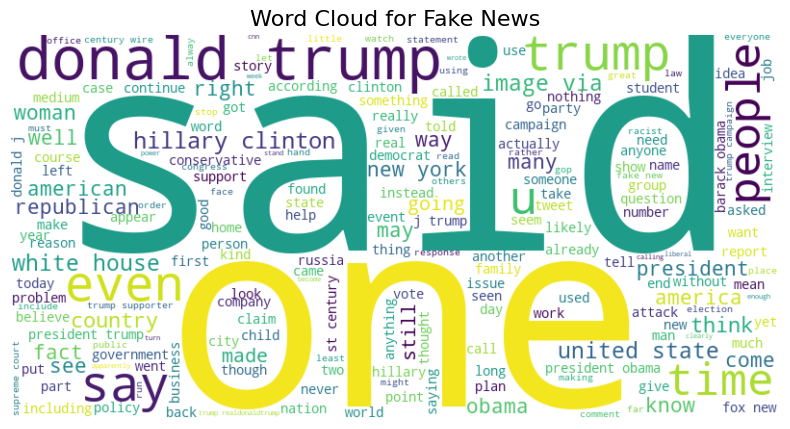

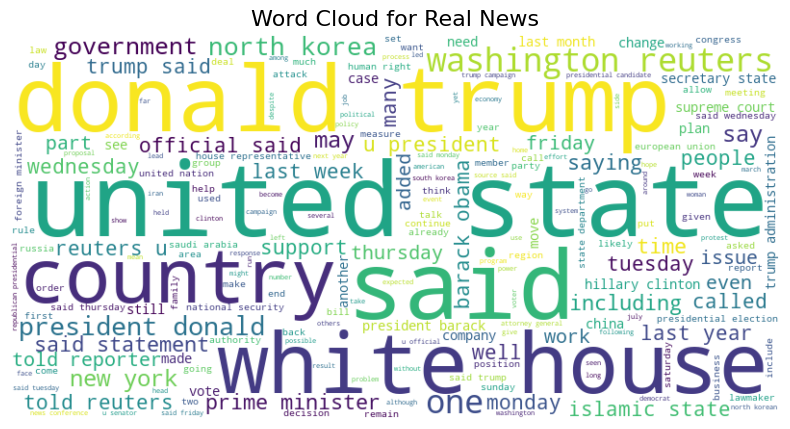

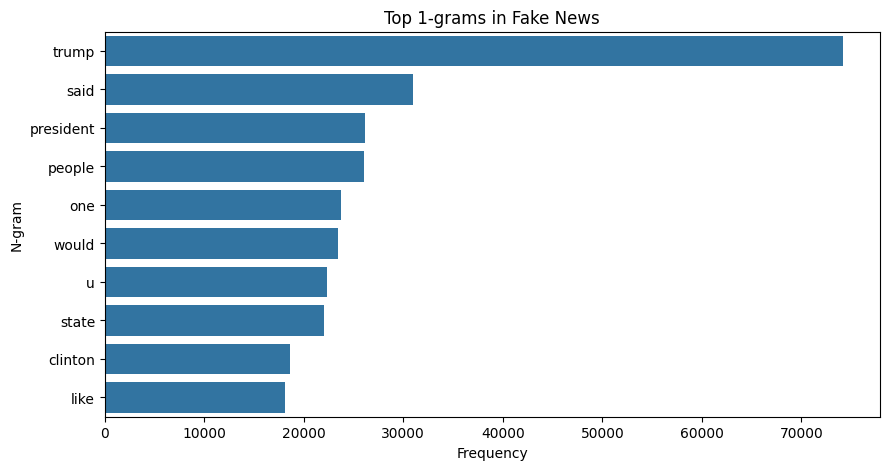

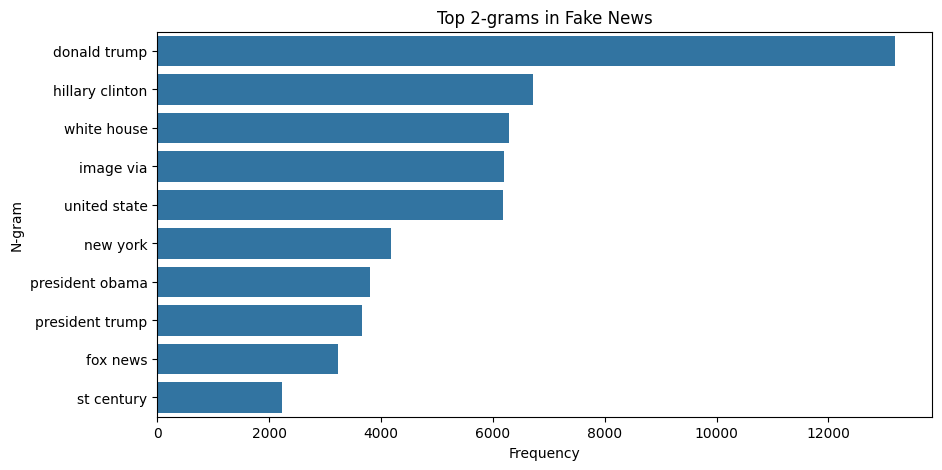

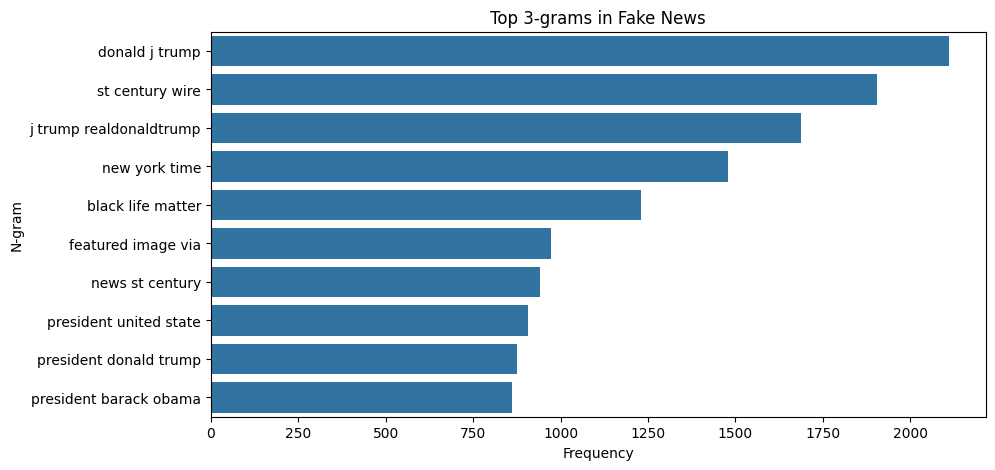

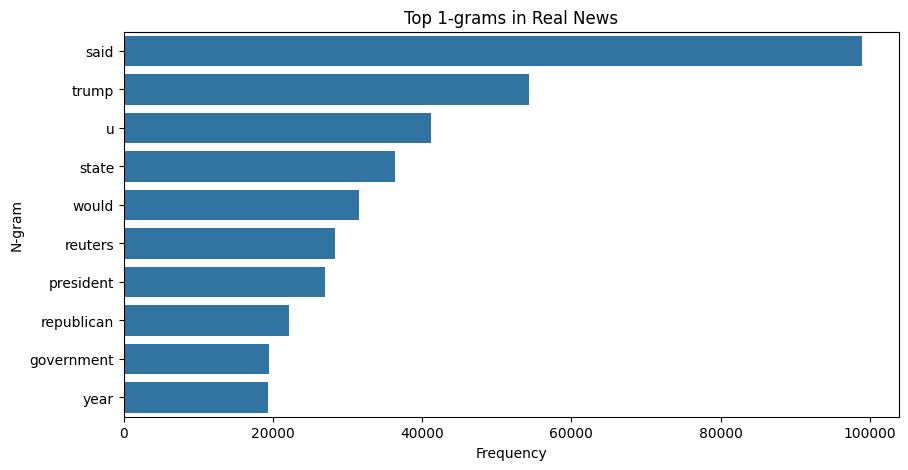

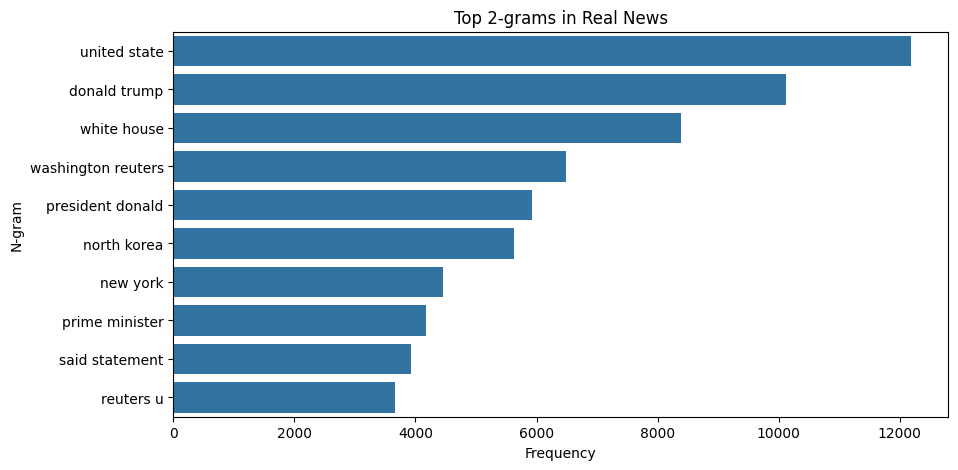

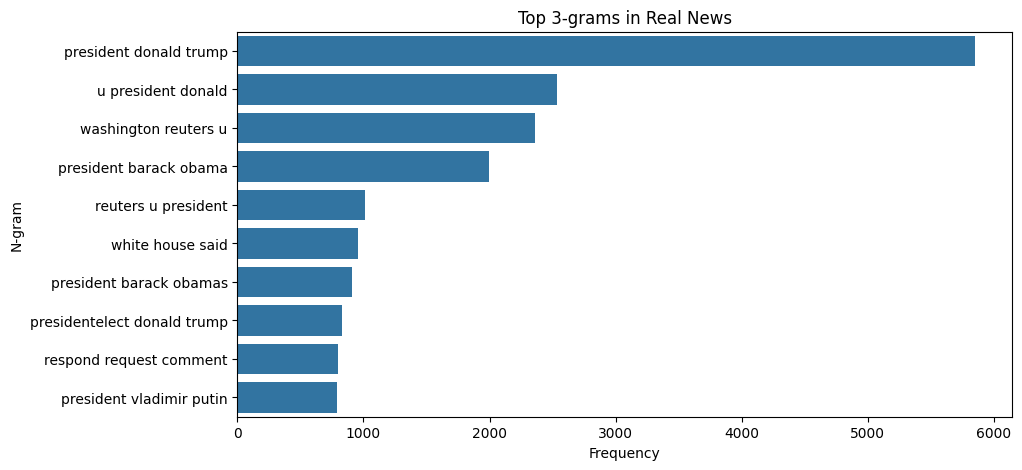

In [4]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd
import seaborn as sns

# Separate fake and real news
fake_news = news_data_cleaned[news_data_cleaned['label'] == 0]['cleaned_text']
real_news = news_data_cleaned[news_data_cleaned['label'] == 1]['cleaned_text']

# Function to generate word clouds
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.show()

# Generate word clouds
generate_wordcloud(fake_news, "Word Cloud for Fake News")
generate_wordcloud(real_news, "Word Cloud for Real News")

# Function to generate n-grams
def generate_ngrams(text, n=1):
    tokens = ' '.join(text).split()
    ngrams = zip(*[tokens[i:] for i in range(n)])
    return Counter([' '.join(gram) for gram in ngrams])

# N-Gram Analysis: unigrams, bigrams, and trigrams
for label, data in [("Fake News", fake_news), ("Real News", real_news)]:
    for n in [1, 2, 3]:
        ngram_counts = generate_ngrams(data, n)
        top_ngrams = ngram_counts.most_common(10)
        ngram_df = pd.DataFrame(top_ngrams, columns=['N-gram', 'Frequency'])

        # Plot top n-grams
        plt.figure(figsize=(10, 5))
        sns.barplot(x='Frequency', y='N-gram', data=ngram_df)
        plt.title(f"Top {n}-grams in {label}")
        plt.show()


# Model building

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Step 1: Define features and target variable
X = news_data_cleaned['cleaned_text']
y = news_data_cleaned['label']

# Step 2: Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 3: Feature extraction using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1, 2))
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Output basic stats of the TF-IDF process
feature_extraction_info = {"Number of Features": X_train_tfidf.shape[1],"Training Set Shape": X_train_tfidf.shape,"Test Set Shape": X_test_tfidf.shape}

feature_extraction_info


# Save the TF-IDF vectorizer
import pickle  # Ensure pickle is imported

# Save the TF-IDF vectorizer
with open("tfidf_vectorizer.pkl", "wb") as vec_file:
    pickle.dump(tfidf_vectorizer, vec_file)

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Logistic Regression
logistic_model = LogisticRegression(max_iter=500, random_state=42)
logistic_model.fit(X_train_tfidf, y_train)
y_pred_logistic = logistic_model.predict(X_test_tfidf)

# Random Forest
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train_tfidf, y_train)
y_pred_rf = random_forest_model.predict(X_test_tfidf)


In [7]:
# Classification reports and accuracy
print("Logistic Regression:")
print(classification_report(y_test, y_pred_logistic))
print("Accuracy:", accuracy_score(y_test, y_pred_logistic))

print("\nRandom Forest:")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))


Logistic Regression:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4696
           1       0.99      0.99      0.99      4284

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980

Accuracy: 0.9908685968819599

Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4696
           1       1.00      1.00      1.00      4284

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980

Accuracy: 0.9976614699331848


# Model Evaluation

In [8]:
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

# Compare Logistic Regression and Random Forest
logistic_accuracy = accuracy_score(y_test, y_pred_logistic)
rf_accuracy = accuracy_score(y_test, y_pred_rf)

# Generate detailed classification reports
logistic_report = classification_report(y_test, y_pred_logistic, output_dict=True)
rf_report = classification_report(y_test, y_pred_rf, output_dict=True)

# Consolidate results
results = pd.DataFrame({"Model": ["Logistic Regression", "Random Forest"],"Accuracy": [logistic_accuracy, rf_accuracy],
                        "Precision": [logistic_report['weighted avg']['precision'], rf_report['weighted avg']['precision']],
                        "Recall": [logistic_report['weighted avg']['recall'], rf_report['weighted avg']['recall']],
                        "F1-Score": [logistic_report['weighted avg']['f1-score'], rf_report['weighted avg']['f1-score']]})

print(results)

# Identify the best model
best_model_name = results.loc[results['Accuracy'].idxmax(), 'Model']
print(f"The best model is: {best_model_name}")


                 Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression  0.990869   0.990878  0.990869  0.990869
1        Random Forest  0.997661   0.997661  0.997661  0.997661
The best model is: Random Forest


In [9]:
import pickle

# Compare model accuracy
logistic_accuracy = accuracy_score(y_test, y_pred_logistic)
rf_accuracy = accuracy_score(y_test, y_pred_rf)

# Determine the best model
if logistic_accuracy >= rf_accuracy:
    best_model = logistic_model
    best_model_name = "Logistic Regression"
else:
    best_model = random_forest_model
    best_model_name = "Random Forest"

# Save the best model
with open("best_model.pkl", "wb") as file:
    pickle.dump(best_model, file)

print(f"The best model is: {best_model_name}, saved as 'best_model.pkl'.")



The best model is: Random Forest, saved as 'best_model.pkl'.
